## Artificial Intelligence Lab
Name: Rahamat-E-Rabbi <br>
ID: 1810976151 <br>
Session: 2017-18 <br>
Dept. of CSE



> ### Importing the Libraries



In [ ]:
from keras.layers import Input, Dense
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.models import Model

### Training Samples

In [ ]:
x = np.random.randint(-20, 20, 10000, dtype=int)
y = 5 * x**3 - 68 * x**2 - 7 * x + 1

### Normalization

In [ ]:
x_data = (2 * (x - np.min(x)) / (np.max(x) - np.min(x))) - 1
y_data = (2 * (y - np.min(y)) / (np.max(y) - np.min(y))) - 1

print(x_data)

[-0.94871795 -0.38461538 -0.79487179 ... -0.53846154  0.02564103
  0.8974359 ]


### Spliting the Dataset into Training & Testing

In [ ]:
x_train, y_train = x_data[: int(len(x_data) * 0.9)] , y_data[: int(len(x_data) * 0.9)]
x_validation, y_validation = x_data[int(len(x_data) * 0.9) : int(len(x_data) * 0.95)] , y_data[int(len(x_data) * 0.9) : int(len(x_data) * 0.95)]
x_test , y_test = x_data[int(len(x_data) * 0.95) :] , y_data[int(len(x_data) * 0.95) :]

### Plotting the Dataset

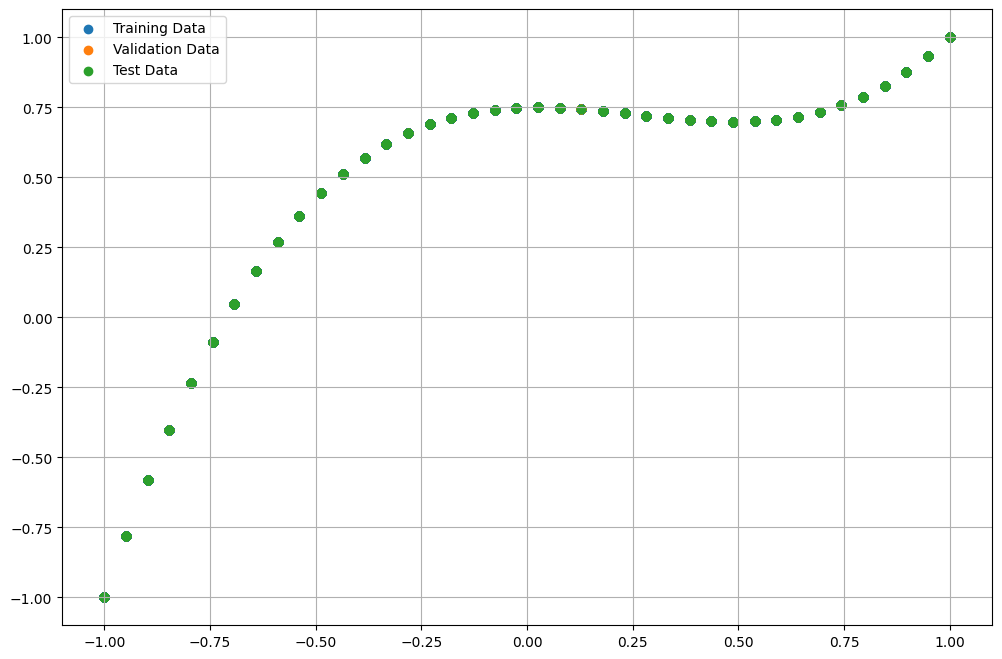

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label = "Training Data")
plt.scatter(x_validation, y_validation, label = "Validation Data")
plt.scatter(x_test, y_test, label = "Test Data")
plt.legend()
plt.grid()
plt.show()

### Building the Model

In [ ]:
inputs = Input((1,), name="Input_Layer")
x = Dense(32, activation = "relu")(inputs)
x = Dense(64, activation = "relu")(x)
x = Dense(128, activation = "relu")(x)
outputs = Dense(1, name = "Output_Layer")(x)

model = Model(inputs, outputs, name = "Deep_Neural_Network_Model")
model.summary()

Model: "Deep_Neural_Network_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 1)]               0         
                                                                 
 dense_9 (Dense)             (None, 32)                64        
                                                                 
 dense_10 (Dense)            (None, 64)                2112      
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 Output_Layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training the Model

In [ ]:
model.compile(
    optimizer = "adam",
    loss = "mean_squared_error",
    metrics = [tf.keras.metrics.R2Score(name = "accuracy")]
)

trained_model = model.fit(x_train, y_train, epochs = 10,  validation_data=(x_validation, y_validation), verbose = 0)
history = trained_model.history

### Plotting the Training & Validation Accuracy

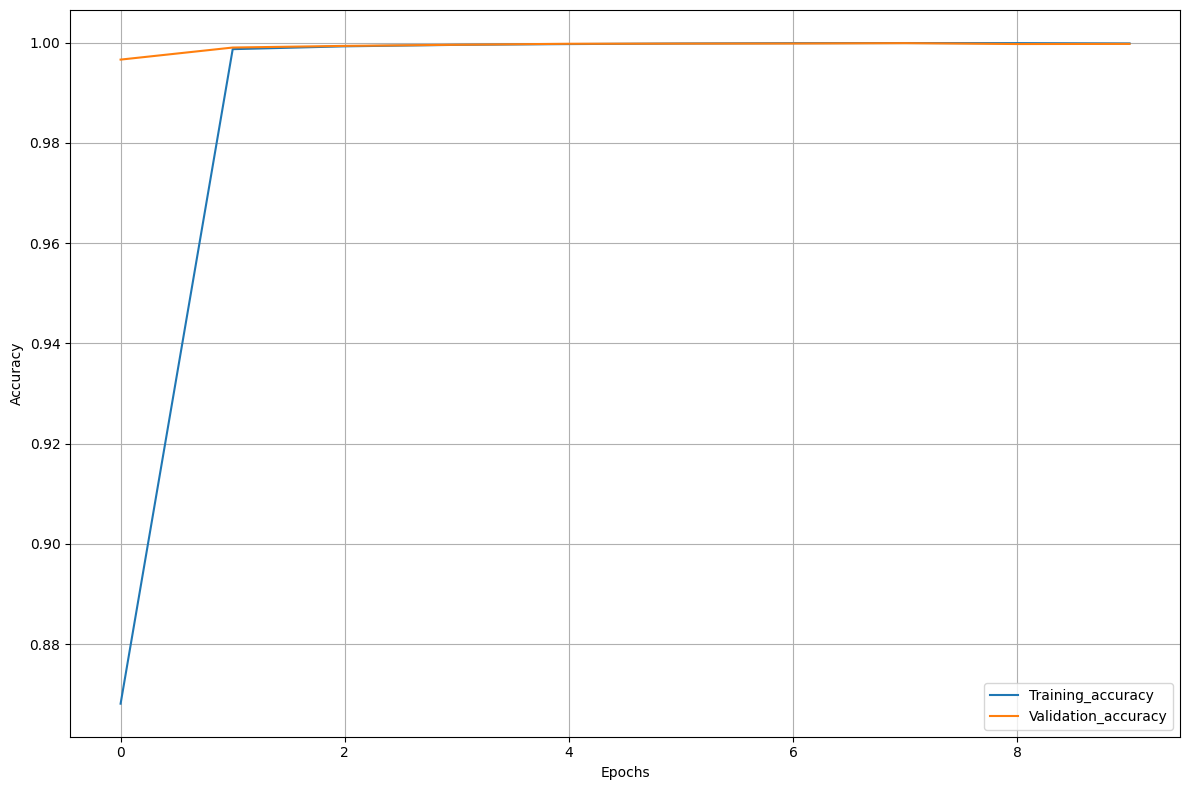

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(history["accuracy"])
plt.plot(history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training_accuracy", "Validation_accuracy"])
plt.grid()

plt.tight_layout()
plt.show()

### Plotting the Training & Validation Loss

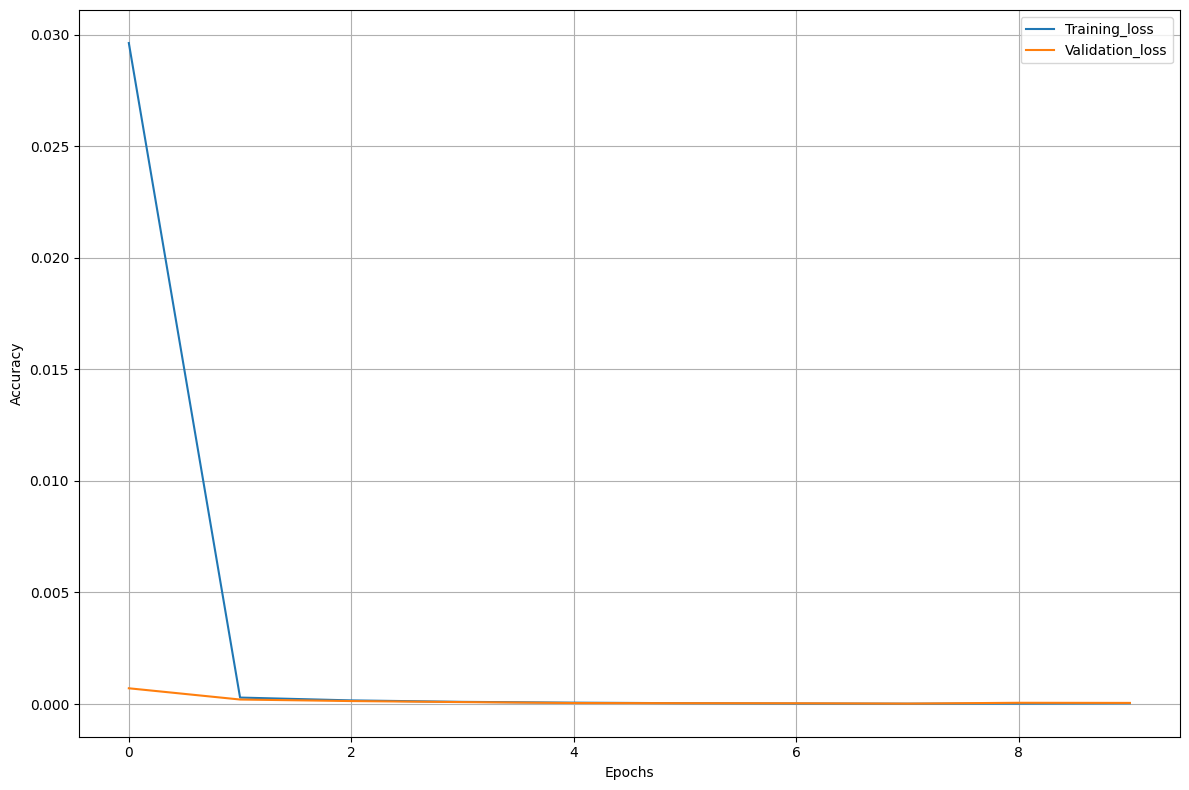

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(history["loss"])
plt.plot(history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training_loss", "Validation_loss"])
plt.grid()

plt.tight_layout()
plt.show()

### Evaluating the Model

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss :.7f}")
print(f"Test Accuracy: {test_accuracy*100 :.5f}%")

16/16 [==============================] - 0s 3ms/step - loss: 4.5774e-05 - accuracy: 0.9998
Test Loss: 0.0000458
Test Accuracy: 99.98040%


### Making Predictions

In [ ]:
predictions = model.predict(x_test)

16/16 [==============================] - 0s 2ms/step


### Display prediction accuracy vs true levels

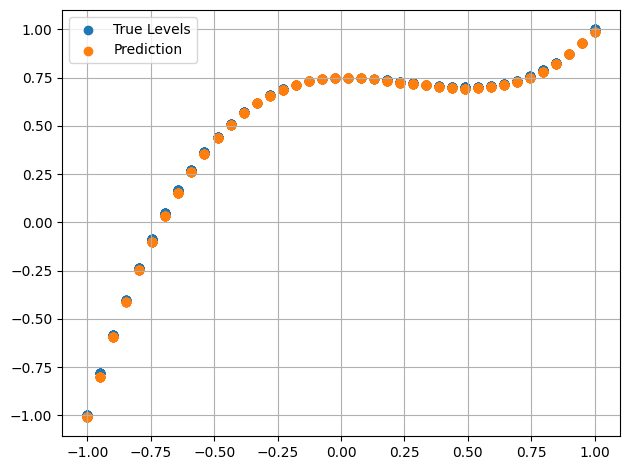

In [ ]:
plt.scatter(x_test,y_test)
plt.scatter(x_test, predictions)
plt.legend(["True Levels", "Prediction"])
plt.tight_layout()
plt.grid()
plt.show()